In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import tweets_utils
import csv
import importlib
import seaborn as sns
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Data collection](#data_collection)
- [Hashtag study](#hashtag_study)
- [Users acitivty](#activity)
- [Urls study](#urls_study)
- [Correlation with conspiracy score](#conspiracy_score_suspended)
- [Profiles activity](#profiles_activity)

In [3]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/not_found/")
issues = pd.read_csv(path[0] + "users_not_found.csv", low_memory=False, lineterminator="\n")
suspended = pd.read_csv(path[0] + "users_not_found_inspected.csv", low_memory=False, lineterminator="\n")
path =  glob.glob("F:/Supsi/COVID-19-Tweets/large_files/urls/")
scores = pd.read_csv(path[0] + "sum_of_urls_df_all_months_with_score.csv", low_memory=False, lineterminator="\n")
df = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/df_suspended.csv", low_memory=False, lineterminator="\n")

In [4]:
suspended

,id,code,message
0,2767590820,63,User has been suspended.
1,887508829587488768,63,User has been suspended.
2,1338073232,63,User has been suspended.
3,1147654506076725248,63,User has been suspended.
4,1160237865516838912,50,User not found.
...,...,...,...
804,1191844511896539136,63,User has been suspended.
805,1091708583388110848,63,User has been suspended.
806,112209293,63,User has been suspended.
807,1239851148187594759,63,User has been suspended.


In [6]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/suspended/*.csv")
sus = pd.DataFrame()
for i in path:
    sus = sus.append(pd.read_csv(i, low_memory=False, lineterminator="\n"))
sus = sus.reset_index(drop=True)
sus = sus.drop_duplicates(subset=["id"])
sus

,id,code,message
0,2789044371,50,User not found.
1,1465048274,63,User has been suspended.
2,1187538722008502274,50,User not found.
3,991298454453284864,50,User not found.
4,723297485142286337,63,User has been suspended.
...,...,...,...
8628,3293934672,50,User not found.
8629,230200026,50,User not found.
8630,3282707335,50,User not found.
8631,1049583492600918016,50,User not found.


In [8]:
ids_suspended = list(sus.loc[(sus['code']==63)]["id"])
len(ids_suspended)

3706

In [ ]:
# issues.loc[(issues["code"].notna())]

In [ ]:
ids_suspended = list(suspended.loc[(suspended['code']==63)]["id"])

In [ ]:
list_name = issues[issues.id.isin(ids_suspended)]["screen_name"]

# Data collection
<a id="data_collection"/>

In [7]:
files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")

In [9]:
cols = ["id", "id_str", "user_id", "user_screen_name", "text","in_reply_to_status_id",
        "in_reply_to_status_id_str" ,"in_reply_to_user_id" ,"in_reply_to_user_id_str" ,"in_reply_to_screen_name",
        "rt_created_at", "rt_in_reply_to_status_id", "rt_in_reply_to_user_id", "rt_id", "rt_user_id", "rt_created_at",
        "rt_user_screen_name", "quoted_status_id" ,"quoted_status_text" ,"quoted_status_created_at", "quoted_user_id",
        "quoted_user_created_at", "hashtags", "user_mentions", "urls"]
df = pd.DataFrame()

In [14]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols, True, list_name))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        df = df.append(lista[i]["df"])
        
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [13]:
df = df.reset_index(drop=True)
df

In [12]:
df.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/df_suspended.csv", 
          encoding='utf-8', index=False, line_terminator='\n')

# User activity
<a id="activity"/>

Number of total tweets: 97562
Number of original tweets: 24482
Number of retweets: 56138
Number of replies: 9272
Number of quotes: 7670
Number of original_tweets: 25.09% of total tweets
Number of retweets: 57.54% of total tweets
Number of replies: 9.5% of total tweets
Number of quotes: 7.86% of total tweets
Check sum == len(tweets):  True


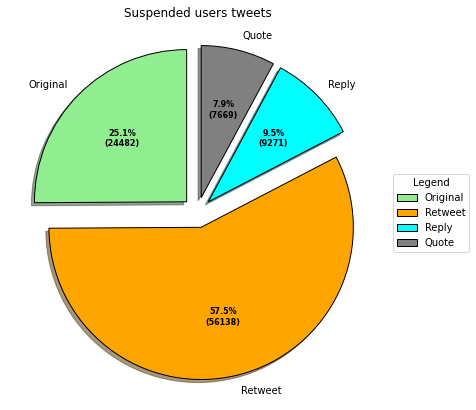

In [18]:
df_split = tweets_utils.split_df(df)
original = df_split["original"]
quote = df_split["quote"]
retweet = df_split["retweet"]
reply = df_split["reply"]
mentions = df_split["original_mention"]
reply_status = df_split['reply_to_status']
retweet_original = df_split['rt_original']
retweet_reply = df_split['rt_in_reply']
retweet_mention = df_split['rt_mention']
quote_original = df_split['quote_original']
quote_reply = df_split['quote_reply']
quote_mention = df_split['quote_mention']
total_len = len(df) 
len_quote = len(quote)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)
len_mentions = len(mentions)
len_reply_status = len(reply_status)
len_retweet_original = len(retweet_original)
len_retweet_reply = len(retweet_reply)
len_retweet_mention = len(retweet_mention)
len_quote_original = len(quote_original)
len_quote_reply = len(quote_reply)
len_quote_mention = len(quote_mention)
tweets_utils.stats(total_len, len_original, len_rt, len_rp, len_quote)
tweets_utils.print_pie_chart4("Suspended users tweets", "Original", "Retweet", "Reply", "Quote", len_original, len_rt, len_rp, len_quote)

# Hashtags study
<a id="hashtag_study"/>

In [96]:
hs = tweets_utils.hashtag_process(df)
list_covid_keyword = ["coronavirus", "covid19", "covid", "chinacoronavirus", "coronavirusoutbreak",
  "covid_19", "sarscov2", "covidー19", "wuhancoronavirus", "wuhan", "china", "coronoavirus", "coronaviruschina"]
list_1 = [item for item in hs if item.lower() not in list_covid_keyword]
# list_1

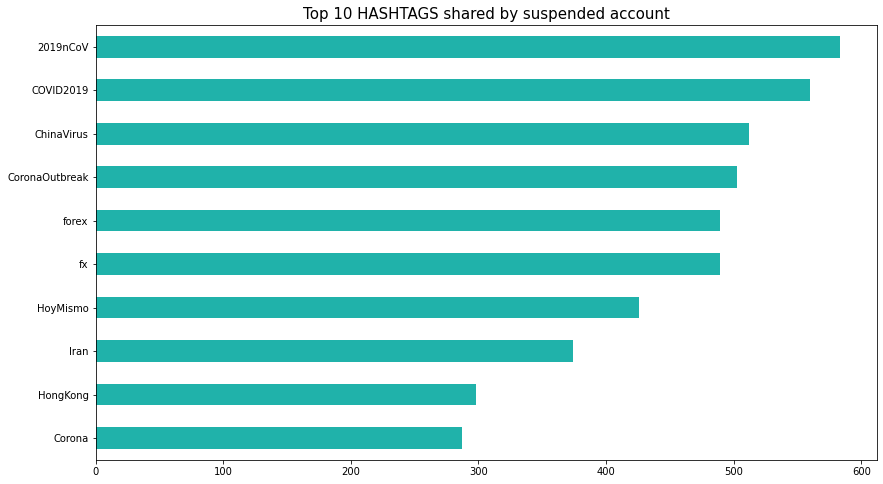

In [100]:
hs = pd.Series(list_1).value_counts().sort_values(ascending=False)
ax = hs[:10].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 HASHTAGS shared by suspended account', fontsize=15)
ax.invert_yaxis()
plt.show()

# Urls study
<a id="urls_study"/>

In [99]:
urls = df["urls"]
urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in urls]
urls = list(filter(lambda num: num != "0", urls))
urls = tweets_utils.remove_www(urls)
urls = pd.Series(urls).value_counts().sort_values(ascending=False)
urls

twitter.com                  8897
bit.ly                       2164
thepigeonexpress.com         1714
mazo4f.com                    894
ow.ly                         572
                             ... 
brighterworld.mcmaster.ca       1
counton2.com                    1
royalcentral.co.uk              1
chroniclelive.co                1
explica.co                      1
Length: 2731, dtype: int64

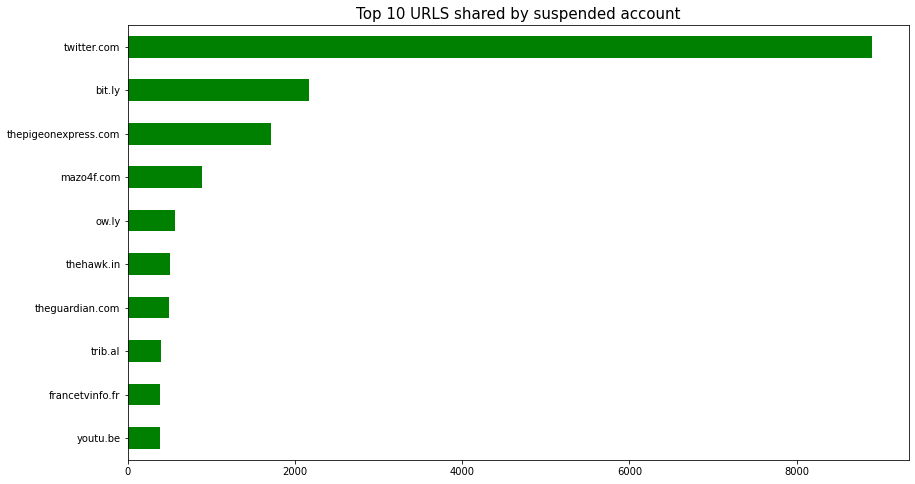

In [102]:
fig = plt.figure(figsize=(14, 8))
ax = urls[:10].plot(kind='barh', color='green', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 URLS shared by suspended account', fontsize=15)
ax.invert_yaxis()
plt.show()

### Correlation with conspiracy score
<a id="conspiracy_score_suspended"/>

In [23]:
df_scores = pd.read_csv("F:/Supsi/COVID-19-Tweets/large_files/scores_dozen_degree.csv", lineterminator="\n", low_memory=False)
df_scores

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score,dozen,name,community,degree
0,KeiserOla,12.0,0.0,1.0,9.0,2.0,1.0,common,KeiserOla,2.0,16.0
1,Breinbrouwsels,25.0,0.0,2.0,19.0,4.0,1.0,common,Breinbrouwsels,2.0,60.0
2,CristianeWynnie,12.0,0.0,1.0,11.0,0.0,1.0,common,CristianeWynnie,32.0,39.0
3,ak2webd3,12.0,0.0,1.0,9.0,2.0,1.0,good,ak2webd3,2.0,42.0
4,jdmcnamara,12.0,0.0,1.0,11.0,0.0,1.0,common,jdmcnamara,2.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
140390,Gus_802,15.0,2.0,0.0,3.0,10.0,0.0,common,Gus_802,1.0,48.0
140391,FemiJelena,15.0,3.0,0.0,7.0,5.0,0.0,bad,FemiJelena,2.0,27.0
140392,tunde_adenuga,15.0,3.0,0.0,10.0,2.0,0.0,common,tunde_adenuga,19.0,33.0
140393,Teensthack,15.0,2.0,0.0,10.0,3.0,0.0,common,Teensthack,6.0,317.0


In [24]:
ids_suspended = list(suspended.loc[(suspended['code']==63)]["id"])
list_name = list(issues[issues.id.isin(ids_suspended)]["screen_name"])

In [25]:
df_suspended_score = df_scores[df_scores["name"].isin(list_name)].reset_index(drop=True) 

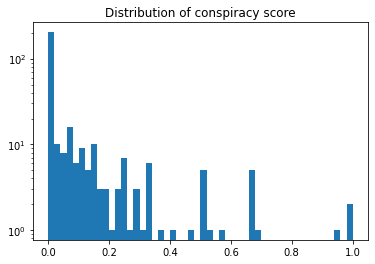

In [26]:
plt.hist(df_suspended_score["conspiracy_score"], 50)
plt.title("Distribution of conspiracy score")
plt.yscale('log', nonposy='clip')
plt.show()

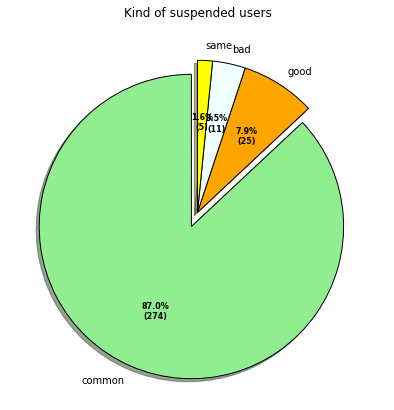

In [27]:
x = df_suspended_score["dozen"].value_counts().sort_values(ascending=False)
data = x
label = x.index
explode = (0.1, 0, 0, 0)
# Creating color parameters
colors = ( "lightgreen", "orange", "azure", "yellow")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = label,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp)

# # Adding legend
# ax.legend(wedges, label,
#           title ="Legend",
#           loc ="center left",
#           bbox_to_anchor =(1, 0.3, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Kind of suspended users")
plt.show()

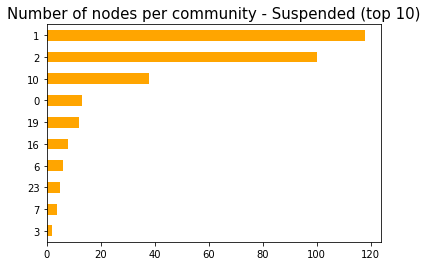

le prime 5 subcommunities sono il 97.14% del totale nella network
il numero di utenti è 315


In [59]:
comm = comm.rename(lambda x: int(x))
# comm = df_suspended_score["community"].value_counts().sort_values(ascending=False)
ax = comm[:10].plot(kind='barh', color='orange') 
ax.set_title('Number of nodes per community - Suspended (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()
s = 0
for i in comm[:10]:
    s = s + i 
print(f"le prime 5 subcommunities sono il {round(s/comm.sum()*100,2)}% del totale nella network")
print(f"il numero di utenti è {comm.sum()}")